In [1]:
# --- 1. Importações e Carregamento dos Dados ---
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Configurações de visualização
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (15, 7)

# --- 2. Carregando os dados já limpos ---
# Vamos carregar os dados que já tratamos no notebook anterior
ticker = 'UUUU'
df = pd.read_csv(f'../data/raw/{ticker}_raw.csv', index_col=0, parse_dates=True)

# Reaplicando os passos de limpeza que já descobrimos
cols_to_convert = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in cols_to_convert:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(inplace=True) # Remove quaisquer linhas com NaN

print("Dados carregados e limpos com sucesso!")
df.info()

Dados carregados e limpos com sucesso!
<class 'pandas.core.frame.DataFrame'>
Index: 2713 entries, 2015-01-02 to 2025-10-15
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2713 non-null   float64
 1   High    2713 non-null   float64
 2   Low     2713 non-null   float64
 3   Open    2713 non-null   float64
 4   Volume  2713 non-null   float64
dtypes: float64(5)
memory usage: 127.2+ KB


/var/folders/bc/3fck38_57j918mwlyxrxlxnh0000gn/T/ipykernel_27268/3273504286.py:15: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv(f'../data/raw/{ticker}_raw.csv', index_col=0, parse_dates=True)


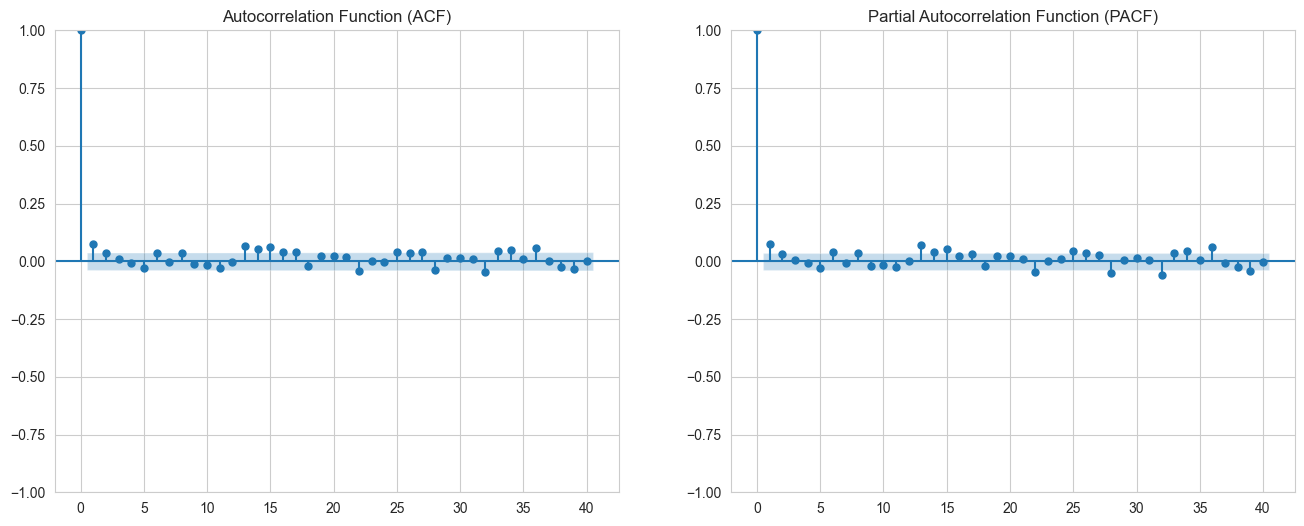

In [2]:
# --- Passagem 1: Criando a série diferenciada (retornos) ---
# O .diff() calcula a diferença entre um elemento e o anterior. É a base para 'd=1'.
df_diff = df['Close'].diff().dropna()

# --- Passagem 2: Criando os gráficos ACF e PACF ---
# Criamos uma figura com dois subplots, um ao lado do outro
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Plotando o gráfico ACF no primeiro subplot (ax1)
plot_acf(df_diff, ax=ax1, lags=40)
ax1.set_title('Autocorrelation Function (ACF)')

# Plotando o gráfico PACF no segundo subplot (ax2)
plot_pacf(df_diff, ax=ax2, lags=40)
ax2.set_title('Partial Autocorrelation Function (PACF)')

plt.show()

In [3]:
# --- Passagem 1: Definindo e Treinando o Modelo ARIMA ---
# Criamos o modelo com a ordem (p, d, q) que definimos
model = ARIMA(df['Close'], order=(1, 1, 1))

# .fit() é o comando que treina o modelo com nossos dados
print("Treinando o modelo ARIMA... (Isso pode levar alguns instantes)")
results = model.fit()
print("Treinamento concluído!")

# --- Passagem 2: Exibindo o Resumo do Modelo ---
# O .summary() nos dá uma tabela estatística completa sobre o modelo treinado
print(results.summary())

Treinando o modelo ARIMA... (Isso pode levar alguns instantes)
Treinamento concluído!
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2713
Model:                 ARIMA(1, 1, 1)   Log Likelihood                   8.066
Date:                Thu, 16 Oct 2025   AIC                            -10.133
Time:                        21:57:32   BIC                              7.584
Sample:                             0   HQIC                            -3.727
                               - 2713                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4068      0.098      4.147      0.000       0.215       0.599
ma.L1         -0.3329      0.104     -3.205  

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Tamanho do conjunto de treino: 2264 dias
Tamanho do conjunto de teste: 449 dias

Treinando o modelo com os dados de treino...
Treinamento concluído!


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarnin

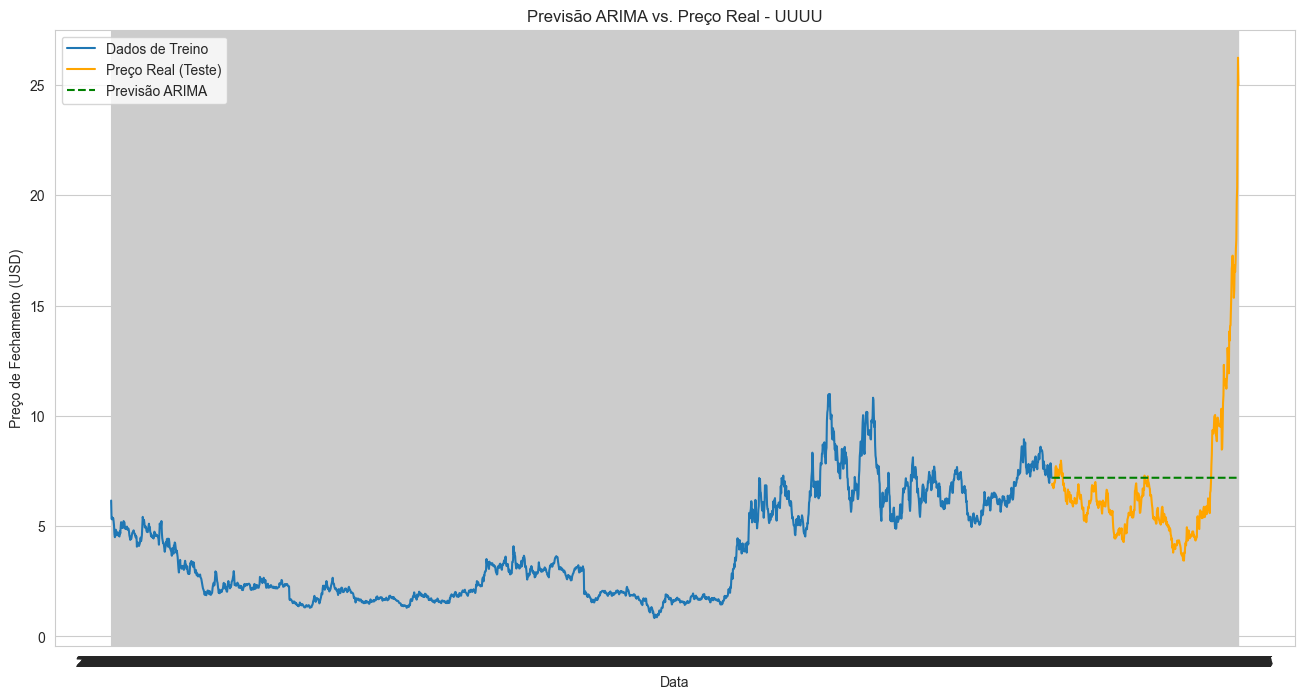

In [5]:
# --- Passagem 1: Dividindo os dados em Treino e Teste ---
train_data = df['Close'][:'2023-12-31']
test_data = df['Close']['2024-01-01':]

print(f"Tamanho do conjunto de treino: {len(train_data)} dias")
print(f"Tamanho do conjunto de teste: {len(test_data)} dias")

# --- Passagem 2: Treinando o modelo APENAS com os dados de treino ---
model = ARIMA(train_data, order=(1, 1, 1))
print("\nTreinando o modelo com os dados de treino...")
results = model.fit()
print("Treinamento concluído!")

# --- Passagem 3: Fazendo a previsão para o período de teste ---
predictions = results.forecast(steps=len(test_data))

# --- Passagem 4 (CORRIGIDA): Alinhando os índices ---
# Copiamos o índice de datas do conjunto de teste para as nossas previsões
predictions.index = test_data.index

# --- Passagem 5: Visualizando a Previsão vs. o Real ---
plt.figure(figsize=(16, 8))
plt.plot(train_data, label='Dados de Treino')
plt.plot(test_data, label='Preço Real (Teste)', color='orange')
plt.plot(predictions, label='Previsão ARIMA', color='green', linestyle='--')

plt.title('Previsão ARIMA vs. Preço Real - UUUU')
plt.xlabel('Data')
plt.ylabel('Preço de Fechamento (USD)')
plt.legend()
plt.show()

In [6]:
# --- Passagem 1: Importando as métricas ---
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# --- Passagem 2: Calculando os erros ---
# Comparamos os dados reais de teste com nossas previsões
mae = mean_absolute_error(test_data, predictions)
rmse = np.sqrt(mean_squared_error(test_data, predictions))

# --- Passagem 3: Exibindo os resultados ---
print("="*50)
print("Avaliação do Modelo ARIMA(1, 1, 1) - Baseline")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print("="*50)

Avaliação do Modelo ARIMA(1, 1, 1) - Baseline
Mean Absolute Error (MAE): 2.1548
Root Mean Squared Error (RMSE): 3.1321
